<a href="https://colab.research.google.com/github/ron1891/bioinfo1_project/blob/main/CoLab_TermProj_2022_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 생물정보학 및 실습 1 - Term Project용 Mission 3 환경 셋업

```
생물정보학 및 실습 1
서울대학교 협동과정 생물정보학전공 2022년 1학기

이 노트북은 Creative Commons BY-SA 조건으로 재사용 가능합니다.
장혜식 <hyeshik@snu.ac.kr>, 서울대학교 생명과학부
```

이 노트북은 Google Colab을 이용해서 Term Project를 할 수 있도록 환경을 준비해 줍니다. 터미널 사용이 원활하지 않은 상태이고, 데이터를 오랫동안 보관하기 어렵기 때문에 되도록 개인용 컴퓨터에서 [Anaconda](https://www.anaconda.com/)나 [JupyterLab](https://jupyterlab.readthedocs.io/en/stable/) 등을 설치하고 사용하시는 것이 편하지만, 개인용 컴퓨터 사양이 부족한 경우에는 Google CoLab을 사용할 수도 있습니다. 개인용 컴퓨터를 쓸 때는 Windows에서는 [WSL2](https://docs.microsoft.com/en-us/windows/wsl/install-win10)를 쓰시면 리눅스 커맨드라인 환경을 쓸 수 있습니다. Google Colab은 창을 닫은 후 90분 후, 또는 창을 처음 열고 12시간 후에 환경을 닫아버리기 때문에 매번 실습할 때마다 새로 셋업이 필요합니다. `Runtime->Run All`을 실행해서 전체를 한 번 실행하시면 준비됩니다. 모든 것이 잘 안 되고 뭔가 꼬인 느낌이 강하게 들 때는 `Runtime->Factory reset runtime`을 누르고 새로 시작하시면 될 수도 있습니다.


## Google Drive 마운트

데이터 파일들을 불러오고 저장하기 위해서 Google Drive를 연결합니다. **이번엔 스크립트 파일을 편집해야 하기 때문에 Google Drive 마운트를 하지 않으면 vim등 콘솔에서 쓸 수 있는 에디터를 쓰셔야 합니다.** 화면에 나오는 주소를 눌러서 인증하고 인증 코드를 그 아래에 입력하세요. 그러면 `/contents/drive/MyDrive`에서 자신의 Drive 최상단 폴더가 보입니다. Google CoLab에서 접속하지 않고, 본인 컴퓨터 또는 연구실 워크스테이션 등 다른 컴퓨터를 쓰시는 경우에는 저장공간이 충분하므로 이 부분은 생략하고 지나갑니다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 실습용 Bioconda 환경 설치하기
Google CoLab에서 접속하지 않고, 본인 컴퓨터 또는 연구실 워크스테이션 등 다른 컴퓨터를 쓰시는 경우에는 따로 실습용 [Bioconda](https://bioconda.github.io/) 환경을 구축해서 이 노트북을 그 환경 안에서 띄우시면 됩니다.

CoLab을 쓰시는 분들은 다음에 따라서 실습용 프로그램들을 쉽게 설치할 수 있도록 [Bioconda](https://bioconda.github.io/) 환경을 만듭니다. 실행하고 진행상황을 관찰하다가 에러로 보이는 것이 있으면 잘 읽어보고 해결합니다.

파이썬 모듈들은 Colab쪽의 파이썬 인터프리터를 바꿀 수 없기 때문에 Conda에 설치하더라도 사용하기 어렵습니다. 파이썬 모듈은 `pip` 명령어로 설치하시면 Colab에서 불러와서 사용할 수 있습니다.

환경 초기화에 관련된 스크립트는 [GitHub 프로젝트](https://github.com/hyeshik/colab-biolab)에 있습니다.

In [2]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

Cloning into 'colab-biolab'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 69 (delta 22), reused 54 (delta 13), pack-reused 0
Unpacking objects: 100% (69/69), done.
./
./root/
./root/.profile
./root/.tmux.conf
./root/.vimrc
./root/.bin.priority/
./root/.bin.priority/pip
./root/.bin.priority/pip2
./root/.bin.priority/pip3
./root/.bashrc.biolab
./root/.condarc
--2022-05-20 04:05:03--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76607678 (73M) [application/x-sh]
Saving to: ‘miniconda3.sh’

miniconda3.sh       100%[===================>]  73.06M   126MB/s    in 0.6s    

2022-05-20 04:05:04 (126 MB/s) - ‘miniconda3.sh’ save

설정이 끝났으면, 이제 콘솔을 열어서 터미널로 접속할 수 있는 통로를 열어줍니다.

## 시퀀싱 데이터 다운로드
이제 실습 수업에서 필요한 시퀀싱 데이터를 다운로드 받아서 설치합시다. 드라이브 공간만 충분하면 데이터는 계속 저장돼 있기 때문에 학기 전체를 통해서 딱 한 번만 하시면 됩니다. Colab에서는 작업용 데이터를 Google Drive 폴더 아래의 `binfo-datapack1`에 저장합니다. 실습용 데이터는 `/content/drive/MyDrive/binfo1-datapack1`에 풀리게 됩니다.

### (Option 1) Google CoLab에서 접속한 경우
1. [Google Drive 공유폴더](https://drive.google.com/drive/folders/1Y190lbO42VEzjjQkgoxNf_EcZJlHyZa1?usp=sharing)에 접속합니다.
1. 중간 제목줄의 "binfo1-datapack1 ▾"에서 ▾을 누릅니다.
1. Add shortcut to Drive를 누릅니다.
1. My Drive를 선택해서 ADD SHORTCUT 버튼을 누릅니다.
1. 다음 cell을 실행해서 링크가 제대로 들어왔는지 확인합니다. (바로 확인되지 않으면 3–5분 정도 기다렸다가 하면 됩니다.)
1. 제대로 확인되면 다음으로 넘어갑니다.


In [3]:
!ls -al /content/drive/MyDrive/binfo1-datapack1/

total 7817834
-rw------- 1 root root 1370036258 May  6 05:31 CLIP-35L33G.bam
-rw------- 1 root root    3118336 May  6 05:31 CLIP-35L33G.bam.bai
-rw------- 1 root root       7077 May 19 07:16 CLIP-let7g.bam
-rw------- 1 root root      14561 May 19 07:16 CLIP-let7g-gene.pileup
-rw------- 1 root root    2685065 May 19 07:16 CLIP-let7g.pileup
drwx------ 2 root root       4096 May 12 06:33 colab-biolab
-rw------- 1 root root  567739792 May 12 10:24 filtered-RPF-siLuc.bam
-rw------- 1 root root   28109361 May 12 10:31 fivepcounts-filtered-RPF-siLuc.txt
-rw------- 1 root root   45957833 May 12 10:26 fivepcounts-RPF-siLuc.bed
-rw------- 1 root root     855103 May 12 10:22 gencode-exons-containing-startcodon.bed
-rw------- 1 root root  883334756 May  6 05:31 gencode.gtf
-rw------- 1 root root   26842797 May 12 10:21 gencode-plusexon.gtf
-rw------- 1 root root    1063832 May 12 10:19 gencode-start.gtf
-rw------- 1 root root       4063 May 19 07:53 let7g.bed
-rw------- 1 root root   24187483 May 

### (Option 2) CoLab외의 다른 환경에서 접속한 경우
본인 컴퓨터나 연구실 워크스테이션 등에서 작업하는 경우에는 다음 명령어로 다운로드 받으시면 됩니다. 첫 번째에는 wget이 접속오류를 내는 경우가 많으니, 접속에러가 발생하면 다시 한 번 실행해 보세요. `/content/drive/Mydrive` 부분은 원하는 저장 경로로 바꿔서 지정하시면 됩니다.

In [ ]:
!wget -O - --no-check-certificate https://hyeshik.qbio.io/binfo/binfo1-datapack1.tar | tar -C /content/drive/MyDrive -xf -

### 파일 체크섬 확인

받은 데이터의 MD5 체크섬을 확인합니다. 한참 걸립니다. 각 파일들의 원래 체크섬은 다음과 같습니다. 한 번 비교해 보세요.

```
140aaf30bcb9276cc716f8699f04ddd6  CLIP-35L33G.bam
f1b3336ed7e2f97d562dcc71641251bd  CLIP-35L33G.bam.bai
328883a73d507eafbf5b60bd6b906201  RNA-control.bam
02073818e2f398a73c3b76e5169de1ca  RNA-control.bam.bai
b09550d09d6c2a4ce27f0226f426fdb1  RNA-siLin28a.bam
fef112c727244060ea62d3f2564a07f6  RNA-siLin28a.bam.bai
28bbd0c47d725669340c784f1b772c01  RNA-siLuc.bam
43590fdc4d81905c0432e0d1cb8cfd5b  RNA-siLuc.bam.bai
5c08a9297307bc83259e658c4474f0cc  RPF-siLin28a.bam
a1bb3e29be412dfd7fd8d16b1b1acc4c  RPF-siLin28a.bam.bai
f2eebf50943024d0116c9cd3e744c707  RPF-siLuc.bam
dc24f69e8f571fc8be30f28ce5b84fcd  RPF-siLuc.bam.bai
```

In [4]:
!md5sum drive/MyDrive/binfo1-datapack1/*

140aaf30bcb9276cc716f8699f04ddd6  drive/MyDrive/binfo1-datapack1/CLIP-35L33G.bam
f1b3336ed7e2f97d562dcc71641251bd  drive/MyDrive/binfo1-datapack1/CLIP-35L33G.bam.bai
0d33bf4b3a5ce22ba13a62323efd6883  drive/MyDrive/binfo1-datapack1/CLIP-let7g.bam
4ea14471c5d4bf9ab1fd91b9a5b2193c  drive/MyDrive/binfo1-datapack1/CLIP-let7g-gene.pileup
a53f66a5575d4ac2d3b4c44af576d44d  drive/MyDrive/binfo1-datapack1/CLIP-let7g.pileup
md5sum: drive/MyDrive/binfo1-datapack1/colab-biolab: Is a directory
d477bd9acca237bbc6e0fbd81cdc6c0b  drive/MyDrive/binfo1-datapack1/filtered-RPF-siLuc.bam
2b5021d2ac3d4830fd963d950a2dc0b8  drive/MyDrive/binfo1-datapack1/fivepcounts-filtered-RPF-siLuc.txt
7211785786bc63bf95a5bb678cad71c1  drive/MyDrive/binfo1-datapack1/fivepcounts-RPF-siLuc.bed
ed47186ee44654792a8a130c695f3a22  drive/MyDrive/binfo1-datapack1/gencode-exons-containing-startcodon.bed
d54d428f5872030c4ffc43058709b896  drive/MyDrive/binfo1-datapack1/gencode.gtf
3469e3e3e018302c5488adc052fd1e21  drive/MyDrive/binfo1

실습에 필요한 프로그램들 몇 가지를 추가로 설치합니다.

In [5]:
!conda install -y bedtools bioawk

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /root/conda/envs/lab

  added / updated specs:
    - bedtools
    - bioawk


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    bioawk-1.0                 |       h7132678_7         196 KB  bioconda
    ------------------------------------------------------------
                                           Total:         196 KB

The following NEW packages will be INSTALLED:

  bioawk             bioconda/linux-64::bioawk-1.0-h7132678_7



bioawk-1.0           | 196 KB    | : 100% 1.0/1 [00:00<00:00,  6.10it/s]                
Preparing transaction: \ done
Verifying transaction: / done
Executing transaction: \ done


## Mission 3

이번 미션에서는 Figure S2A 아랫쪽에 표시되는 clustered error 분석 (CIMS; Crosslinking-induced mutation sites)을 합니다. 자외선에 의해서 단백질이 붙어있다가 단백질 분해효소로 단백질을 뜯어내고 남은 자리에서는 reversetranscriptase가 오류를 자주 냅니다. 오류율을 분석해서 단백질이 앉아 있었던 자리를 분석해 봅시다.

데이터는 지난 번과 동일하기 때문에 이미 다운로드 받으셨다면 다시 다운로드 받을 필요는 없습니다.

In [6]:
%cd /content/drive/MyDrive/binfo1-datapack1/

/content/drive/MyDrive/binfo1-datapack1


Genome 전체로 계산하는 방법은 자원도 꽤 쓰고 시간이 걸리기 때문에 여기서는 유전자 단위로 간략하게 하도록 합시다. 예시로 Mirlet7g를 해 보고, 추가로 Mirlet7f-1과 Mirlet7d도 봐서 비교해 봅시다.

논문은 예전 레퍼런스 유전체인 mm9을 쓰고 있기 때문에, 현재 사용되는 레퍼런스 mm39와는 좌표계에 차이가 있습니다. 새로 annotation에서 위치를 찾습니다.

In [7]:
!grep -i mirlet7g gencode.gtf

chr9	ENSEMBL	gene	106056039	106056126	.	+	.	gene_id "ENSMUSG00000065440.3"; gene_type "miRNA"; gene_name "Mirlet7g"; level 3; mgi_id "MGI:2676800";
chr9	ENSEMBL	transcript	106056039	106056126	.	+	.	gene_id "ENSMUSG00000065440.3"; transcript_id "ENSMUST00000083506.3"; gene_type "miRNA"; gene_name "Mirlet7g"; transcript_type "miRNA"; transcript_name "Mirlet7g-201"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676800"; tag "basic";
chr9	ENSEMBL	exon	106056039	106056126	.	+	.	gene_id "ENSMUSG00000065440.3"; transcript_id "ENSMUST00000083506.3"; gene_type "miRNA"; gene_name "Mirlet7g"; transcript_type "miRNA"; transcript_name "Mirlet7g-201"; exon_number 1; exon_id "ENSMUSE00000522665.2"; level 3; transcript_support_level "NA"; mgi_id "MGI:2676800"; tag "basic";


Splicing 되지 않는 transcript이기 때문에 결과가 단조롭습니다. 해당 좌표 범위로 bam을 솎아냅니다.

In [8]:
!samtools view -b -o CLIP-let7g.bam CLIP-35L33G.bam chr9:106056039-106056126
!samtools view CLIP-let7g.bam | wc -l

163


각 자리에 mapping된 read들의 분포를 요약하기 위해 samtools mpileup을 이용합니다. Shannon entropy를 구할 때는 reference를 따로 줄 필요는 없습니다. samtools를 쓰지 않고 직접 read를 분석하면 더욱 더 재미있습니다.

In [9]:
!samtools mpileup CLIP-let7g.bam > CLIP-let7g.pileup
!wc -l CLIP-let7g.pileup

[mpileup] 1 samples in 1 input files
68548 CLIP-let7g.pileup


Mirlet7g는 100bp도 안 되는 짧은 gene인데 `mpileup` 결과는 엄청 길게 나옵니다. 왜 그럴까요? (잘 한 번 생각해 봅시다)

이제 Mirlet7g의 핵심부분을 살펴봐서 어떻게 하면 좋을지 견적을 내 봅니다.

In [10]:
!head CLIP-let7g.pileup

chr9	106007092	N	9	^Ga^Ia^Ha^Ia^Ga^Ga^Ha^Ia^Ia	<IFIGGHII
chr9	106007093	N	9	ggggggggg	AFGIEGDII
chr9	106007094	N	9	ccccccccc	EHHIGAFEH
chr9	106007095	N	9	aaaaaaaaa	?HDIFA>II
chr9	106007096	N	9	aaaaaaaaa	EHHIG@CHH
chr9	106007097	N	9	ttttttttt	=HGEGDFII
chr9	106007098	N	9	aaaaaaaaa	?HHIGDEII
chr9	106007099	N	9	g-2nng-2nng-2nng-2nng-2nng-2nng-2nng-2nng-2nn	?IEHGEDII
chr9	106007100	N	9	*********	8IBIBC@EI
chr9	106007101	N	9	*********	8IBIBC@EI


In [11]:
!awk '$2 >= 106056039 && $2 <= 106056126 { print $0; }' CLIP-let7g.pileup > CLIP-let7g-gene.pileup
!tail CLIP-let7g-gene.pileup

chr9	106056117	N	138	<<<<<<<<<CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC	BHEIG?DIIHGHII:;HGIIDGGGIIBGEB?>H<GGIIIIDIIGFHIHH9IGG=GGHIDH?DGIBIIHHGGIEIGI8GIDHDG.GGHEDIIDIDGDHIDGIFGHG;DCDDHEE@I?CGG:IHGIBGIHIIDG@DHIGG
chr9	106056118	N	139	<<<<<<<<<CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC	BHEIG?DIIHGHII3AHIIIDGGGIIB3EHFBH>GIIIIIIIIIHIIHHAIIGBDGHIDH?GIIGIIHHDIIHIGIGGI=BGG9GIHHHIIGI=IAIIGGIEHGIEBG@DHDE;IBDGG4IGGIGGIIIIGGGDGIH1G
chr9	106056119	N	138	<<<<<<<<<TTTTTTTTTTTTTTTTTTTTTTTTTT$TTTT$TTTTTTTTTTTTTTT$TTTT$TTTTTTT$TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT	BHEIG?DIIGEFII:/GIIEDDHDIIF>BH3<HBEGIHIGFIIIBIIBE:HHGD>EGGDH7BIIGGIHHDHIHDEIGEIDHGG;GIHGHHIGD:IGHD:GGEHH?3G87HD</I=DGG=IHHIHBIFII@<HDHHH1G
chr9	106056120	N	133	<<<<<<<<<TTTTTTTTTTTTTTTTTTTTTTTTTTTT$TTTT$TTT$TTTTTTTTTT$TTTTTTTT$TTTTTTTT

이제 pandas에 불러와서 분석해 봅니다. R을 쓰시는 분들은 R로 보내서 작업하셔도 됩니다.

In [12]:
import pandas as pd

pileup = pd.read_csv('CLIP-let7g-gene.pileup', sep='\t', names=['chrom', 'pos', '_ref', 'count', 'basereads', 'quals'])
pileup.tail()

,chrom,pos,_ref,count,basereads,quals
83,chr9,106056122,N,88,<<<<<<<<<C$C$C$C$C$C$C$C$C$C$C$C$C$CCCCCC$C$C$...,BHEIG?DIIEEGIIC;GIHEGBIIIIB1=FII?FEIGGGHDBIG=H...
84,chr9,106056123,N,31,<<<<<<<<<CCCCCCCCCCCCCCCCCCCCCC,BHEIG?DIIIIII>GIGGIGGD>BIHHHIEH
85,chr9,106056124,N,31,<<<<<<<<<AAAAAAAAAAAAAAAAAAAAAA,BHEIG?DIIIIHIGGIGGGIG:9DDBIEGFH
86,chr9,106056125,N,31,<<<<<<<<<GGGGGGGGGGGGGGGGGGGGGG,BHEIG?DIIIIIIGGE@GFIGD;GIGIIFHD
87,chr9,106056126,N,30,<<<<<<<<<GGGGGGGGGGGGGGGGGGGGG,BHEIG?DIIIIGHGHIGHI>G;GGGIGIHG


여기서 pileup에서 계산에 사용할 것은 match와 substitution만입니다. 나머지에 해당하는 tag들은 제거합니다.

R을 쓰시는 분들은 R로 보내서 작업하셔도 됩니다.

In [13]:
import re
toremove = re.compile('[<>$*#^]')
pileup['matches'] = pileup['basereads'].apply(lambda x: toremove.sub('', x))

In [14]:
pileup[['chrom', 'pos', 'matches']]

,chrom,pos,matches
0,chr9,106056039,
1,chr9,106056040,
2,chr9,106056041,
3,chr9,106056042,
4,chr9,106056043,
...,...,...,...
83,chr9,106056122,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...
84,chr9,106056123,CCCCCCCCCCCCCCCCCCCCCC
85,chr9,106056124,AAAAAAAAAAAAAAAAAAAAAA
86,chr9,106056125,GGGGGGGGGGGGGGGGGGGGGG


In [15]:
pileup[pileup['pos'] == 106056094].iloc[0]['matches']

'GGGGGGAAAAAAAAGGGGGAAAAAAGCCGCAGGATGAGGTGATAAGGGAGGGGTGAAGGGCGGTGAAGGGGAAAAGAGAAAGAAAAATAAAGGGGGAGTGGGAGGAAGAAGAGAATA'

자 이제 데이터 준비가 대충 끝났습니다. 다음 순서로 진행해 보세요. (1-4번 단계는 R을 쓰시는 분들은 R로 보내서 작업하셔도 됩니다.)

1. 각 position별로 base수를 셉니다.
1. 각 position별로 Shannon entropy를 계산합니다.
1. 계산한 Shannon entropy를 [bedgraph format](https://genome.ucsc.edu/goldenPath/help/bedgraph.html)으로 출력합니다. 말은 복잡해도 실제로는 간단합니다. 4칸짜리를 만드시면 됩니다.
1. 결과 파일을 본인의 Google Drive에서 가져옵니다.
1. [UCSC Genome Browser](http://genome.ucsc.edu/cgi-bin/hgTracks?db=mm39&lastVirtModeType=default&lastVirtModeExtraState=&virtModeType=default&virtMode=0&nonVirtPosition=&position=chr9%3A106056039-106056126)에 접속해서 Genome은 mm39로 선택합니다.
1. 그래프 아랫쪽의 add custom tracks 버튼을 누릅니다.
1. Paste URLs or data 옆의 Choose File 버튼을 누르고 우리가 만든 bedgraph 파일을 업로드 합니다.
1. 그리고 이리 저리 감상해 보다가 View 메뉴의 PDF/PS 를 눌러서 인증샷을 한 번 찍습니다.
1. Mirlet7d와 Mirlet7f-1도 한 번 해 봅니다.

## Check pileup dataframe

In [16]:
pileup

,chrom,pos,_ref,count,basereads,quals,matches
0,chr9,106056039,N,9,<<<<<<<<<,BHEIG?DII,
1,chr9,106056040,N,9,<<<<<<<<<,BHEIG?DII,
2,chr9,106056041,N,9,<<<<<<<<<,BHEIG?DII,
3,chr9,106056042,N,9,<<<<<<<<<,BHEIG?DII,
4,chr9,106056043,N,9,<<<<<<<<<,BHEIG?DII,
...,...,...,...,...,...,...,...
83,chr9,106056122,N,88,<<<<<<<<<C$C$C$C$C$C$C$C$C$C$C$C$C$CCCCCC$C$C$...,BHEIG?DIIEEGIIC;GIHEGBIIIIB1=FII?FEIGGGHDBIG=H...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...
84,chr9,106056123,N,31,<<<<<<<<<CCCCCCCCCCCCCCCCCCCCCC,BHEIG?DIIIIII>GIGGIGGD>BIHHHIEH,CCCCCCCCCCCCCCCCCCCCCC
85,chr9,106056124,N,31,<<<<<<<<<AAAAAAAAAAAAAAAAAAAAAA,BHEIG?DIIIIHIGGIGGGIG:9DDBIEGFH,AAAAAAAAAAAAAAAAAAAAAA
86,chr9,106056125,N,31,<<<<<<<<<GGGGGGGGGGGGGGGGGGGGGG,BHEIG?DIIIIIIGGE@GFIGD;GIGIIFHD,GGGGGGGGGGGGGGGGGGGGGG


## Count number of base on each position

In [17]:
for base in ["A", "T", "C", "G"]:
    pileup[base] = pileup.matches.str.count(base)

pileup

,chrom,pos,_ref,count,basereads,quals,matches,A,T,C,G
0,chr9,106056039,N,9,<<<<<<<<<,BHEIG?DII,,0,0,0,0
1,chr9,106056040,N,9,<<<<<<<<<,BHEIG?DII,,0,0,0,0
2,chr9,106056041,N,9,<<<<<<<<<,BHEIG?DII,,0,0,0,0
3,chr9,106056042,N,9,<<<<<<<<<,BHEIG?DII,,0,0,0,0
4,chr9,106056043,N,9,<<<<<<<<<,BHEIG?DII,,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
83,chr9,106056122,N,88,<<<<<<<<<C$C$C$C$C$C$C$C$C$C$C$C$C$CCCCCC$C$C$...,BHEIG?DIIEEGIIC;GIHEGBIIIIB1=FII?FEIGGGHDBIG=H...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,0,0,79,0
84,chr9,106056123,N,31,<<<<<<<<<CCCCCCCCCCCCCCCCCCCCCC,BHEIG?DIIIIII>GIGGIGGD>BIHHHIEH,CCCCCCCCCCCCCCCCCCCCCC,0,0,22,0
85,chr9,106056124,N,31,<<<<<<<<<AAAAAAAAAAAAAAAAAAAAAA,BHEIG?DIIIIHIGGIGGGIG:9DDBIEGFH,AAAAAAAAAAAAAAAAAAAAAA,22,0,0,0
86,chr9,106056125,N,31,<<<<<<<<<GGGGGGGGGGGGGGGGGGGGGG,BHEIG?DIIIIIIGGE@GFIGD;GIGIIFHD,GGGGGGGGGGGGGGGGGGGGGG,0,0,0,22


In [18]:
# change into probability value
pileup[["A", "T", "C", "G"]] = pileup[["A", "T", "C", "G"]].div(pileup[["A", "T", "C", "G"]].sum(axis=1), axis=0)
pileup_bp = pileup
pileup_bp

,chrom,pos,_ref,count,basereads,quals,matches,A,T,C,G
0,chr9,106056039,N,9,<<<<<<<<<,BHEIG?DII,,NaN,NaN,NaN,NaN
1,chr9,106056040,N,9,<<<<<<<<<,BHEIG?DII,,NaN,NaN,NaN,NaN
2,chr9,106056041,N,9,<<<<<<<<<,BHEIG?DII,,NaN,NaN,NaN,NaN
3,chr9,106056042,N,9,<<<<<<<<<,BHEIG?DII,,NaN,NaN,NaN,NaN
4,chr9,106056043,N,9,<<<<<<<<<,BHEIG?DII,,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
83,chr9,106056122,N,88,<<<<<<<<<C$C$C$C$C$C$C$C$C$C$C$C$C$CCCCCC$C$C$...,BHEIG?DIIEEGIIC;GIHEGBIIIIB1=FII?FEIGGGHDBIG=H...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,0.0,0.0,1.0,0.0
84,chr9,106056123,N,31,<<<<<<<<<CCCCCCCCCCCCCCCCCCCCCC,BHEIG?DIIIIII>GIGGIGGD>BIHHHIEH,CCCCCCCCCCCCCCCCCCCCCC,0.0,0.0,1.0,0.0
85,chr9,106056124,N,31,<<<<<<<<<AAAAAAAAAAAAAAAAAAAAAA,BHEIG?DIIIIHIGGIGGGIG:9DDBIEGFH,AAAAAAAAAAAAAAAAAAAAAA,1.0,0.0,0.0,0.0
86,chr9,106056125,N,31,<<<<<<<<<GGGGGGGGGGGGGGGGGGGGGG,BHEIG?DIIIIIIGGE@GFIGD;GIGIIFHD,GGGGGGGGGGGGGGGGGGGGGG,0.0,0.0,0.0,1.0


## Calculate entropy

In [19]:
import numpy as np
from scipy.stats import entropy

prop = pileup_bp[["A", "T", "C", "G"]].to_numpy()
pileup_bp["entropy"] = -np.sum(prop * np.log(prop + 1e-9), axis=1)
pileup_bp


,chrom,pos,_ref,count,basereads,quals,matches,A,T,C,G,entropy
0,chr9,106056039,N,9,<<<<<<<<<,BHEIG?DII,,NaN,NaN,NaN,NaN,NaN
1,chr9,106056040,N,9,<<<<<<<<<,BHEIG?DII,,NaN,NaN,NaN,NaN,NaN
2,chr9,106056041,N,9,<<<<<<<<<,BHEIG?DII,,NaN,NaN,NaN,NaN,NaN
3,chr9,106056042,N,9,<<<<<<<<<,BHEIG?DII,,NaN,NaN,NaN,NaN,NaN
4,chr9,106056043,N,9,<<<<<<<<<,BHEIG?DII,,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
83,chr9,106056122,N,88,<<<<<<<<<C$C$C$C$C$C$C$C$C$C$C$C$C$CCCCCC$C$C$...,BHEIG?DIIEEGIIC;GIHEGBIIIIB1=FII?FEIGGGHDBIG=H...,CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC...,0.0,0.0,1.0,0.0,-1.000000e-09
84,chr9,106056123,N,31,<<<<<<<<<CCCCCCCCCCCCCCCCCCCCCC,BHEIG?DIIIIII>GIGGIGGD>BIHHHIEH,CCCCCCCCCCCCCCCCCCCCCC,0.0,0.0,1.0,0.0,-1.000000e-09
85,chr9,106056124,N,31,<<<<<<<<<AAAAAAAAAAAAAAAAAAAAAA,BHEIG?DIIIIHIGGIGGGIG:9DDBIEGFH,AAAAAAAAAAAAAAAAAAAAAA,1.0,0.0,0.0,0.0,-1.000000e-09
86,chr9,106056125,N,31,<<<<<<<<<GGGGGGGGGGGGGGGGGGGGGG,BHEIG?DIIIIIIGGE@GFIGD;GIGIIFHD,GGGGGGGGGGGGGGGGGGGGGG,0.0,0.0,0.0,1.0,-1.000000e-09


In [20]:
pileup_bp = pileup_bp[["chrom", "pos", "pos", "entropy"]]
pileup_bp.columns = ["chrom", "start", "end", "entropy"]
pileup_bp["end"] = pileup['pos'] + (pileup['basereads'].apply(len))
pileup_bp

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,chrom,start,end,entropy
0,chr9,106056039,106056048,NaN
1,chr9,106056040,106056049,NaN
2,chr9,106056041,106056050,NaN
3,chr9,106056042,106056051,NaN
4,chr9,106056043,106056052,NaN
...,...,...,...,...
83,chr9,106056122,106056267,-1.000000e-09
84,chr9,106056123,106056154,-1.000000e-09
85,chr9,106056124,106056155,-1.000000e-09
86,chr9,106056125,106056156,-1.000000e-09


In [22]:
pileup_let7g = pileup_bp.dropna()

In [27]:
pileup_let7g.sort_values(by=['entropy'], axis=0)

,chrom,start,end,entropy
46,chr9,106056085,106056128,-1.000000e-09
64,chr9,106056103,106056242,-1.000000e-09
63,chr9,106056102,106056241,-1.000000e-09
62,chr9,106056101,106056240,-1.000000e-09
60,chr9,106056099,106056251,-1.000000e-09
...,...,...,...,...
56,chr9,106056095,106056265,2.085081e-01
52,chr9,106056091,106056260,3.306806e-01
54,chr9,106056093,106056313,3.399213e-01
6,chr9,106056045,106056123,4.692203e-01


In [28]:
pileup_let7g.to_csv("let7g.bed", sep="\t", header=None, index=False)

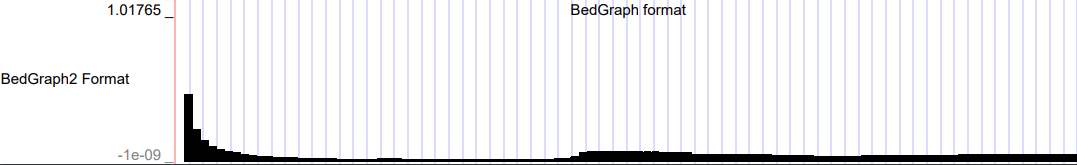